# Multiple Linear Regression
## Bike share Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —


You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

In [68]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [69]:
day = pd.read_csv("day.csv")

In [70]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [71]:
day.shape

(730, 16)

In [72]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [73]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [74]:
#dropping a few redundant columns
#drop holiday and weekday columns as the information is essentially captured in the workingday column
#also dropping temp column as I feel atemp would be more inline with the user preference
#dropping casual and registered as well as we are able to encapsulate that information in the cnt column

day = day.drop(['holiday', 'weekday', 'temp', 'casual', 'registered'], axis=1)

In [75]:
#dropping the dteday as the exact date does not add any value in the prediction
day = day.drop(['dteday'], axis=1)

In [76]:
#dropping the instant column
day = day.drop(['instant'], axis=1)

In [77]:
#creating a season categorical variables 
def season_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Applying the function to the day list
day[['season']] = day[['season']].apply(season_map)

In [78]:
#creating a weathersit categorical variables 
def weather_map(x):
    return x.map({1: 'ideal', 2: 'moderate', 3: 'moderate', 4: 'difficult'})

# Applying the function to the day list
day[['weathersit']] = day[['weathersit']].apply(weather_map)

## Step 2: Visualising the Data

Checking for the below.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

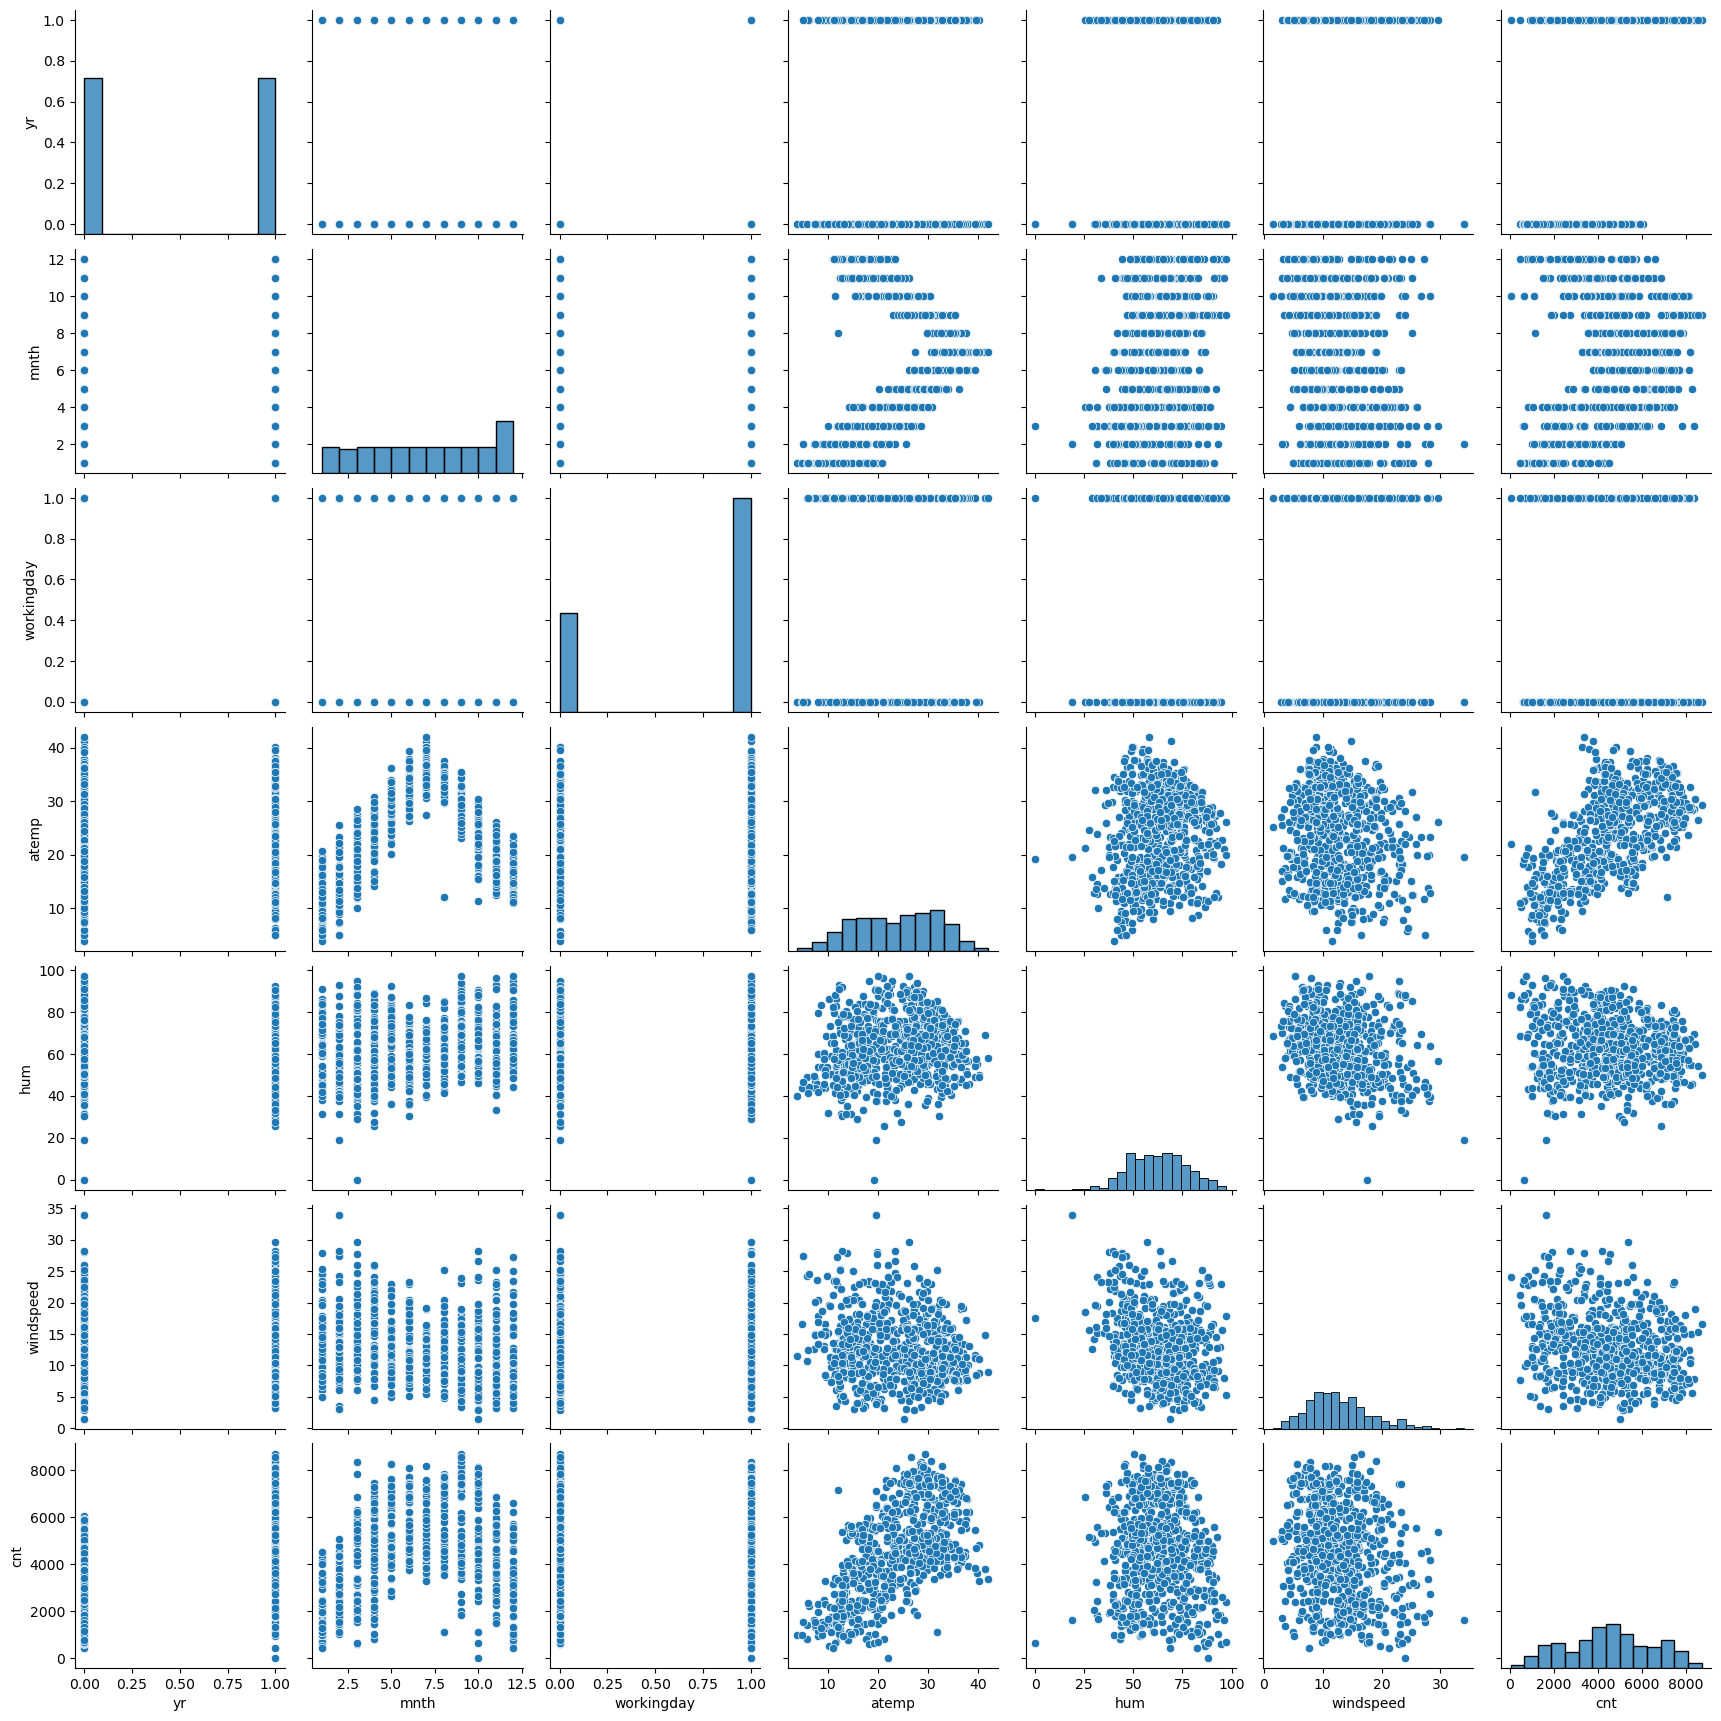

In [79]:
sns.pairplot(day)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

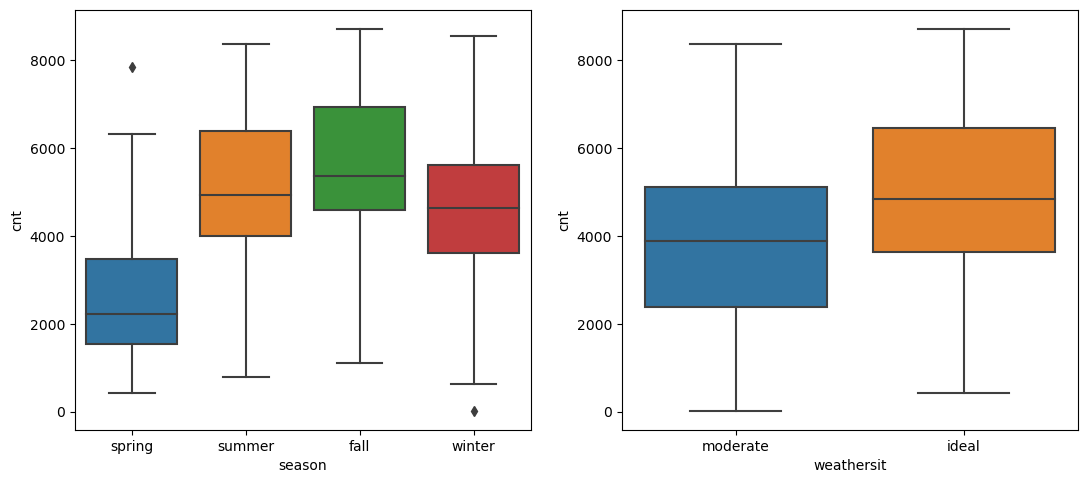

In [54]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

## Step 3: Data Preparation

### Dummy Variables

The variable `season` has four levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [80]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'
season_dummy = pd.get_dummies(day['season'], drop_first = True)

In [81]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummy'
weathersit_dummy = pd.get_dummies(day['weathersit'], drop_first = True)

In [82]:
# Add the results to the original housing dataframe

day = pd.concat([day, season_dummy], axis = 1)
day = pd.concat([day, weathersit_dummy], axis = 1)

In [83]:
# Now let's see the head of our dataframe.

day.head()

,season,yr,mnth,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,moderate
0,spring,0,1,0,moderate,18.18125,80.5833,10.749882,985,1,0,0,1
1,spring,0,1,0,moderate,17.68695,69.6087,16.652113,801,1,0,0,1
2,spring,0,1,1,ideal,9.47025,43.7273,16.636703,1349,1,0,0,0
3,spring,0,1,1,ideal,10.60610,59.0435,10.739832,1562,1,0,0,0
4,spring,0,1,1,ideal,11.46350,43.6957,12.522300,1600,1,0,0,0


In [84]:
# Drop 'season', 'weathersit' as we have created the dummies for it

day.drop(['season', 'weathersit'], axis = 1, inplace = True)

In [85]:
day.head()

,yr,mnth,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,moderate
0,0,1,0,18.18125,80.5833,10.749882,985,1,0,0,1
1,0,1,0,17.68695,69.6087,16.652113,801,1,0,0,1
2,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0
3,0,1,1,10.60610,59.0435,10.739832,1562,1,0,0,0
4,0,1,1,11.46350,43.6957,12.522300,1600,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [190]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [191]:
from sklearn.preprocessing import MinMaxScaler

In [192]:
scaler = MinMaxScaler()

In [193]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['atemp', 'windspeed', 'hum', 'cnt',]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [194]:
df_train.head()

,yr,mnth,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,moderate
653,1,10,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0
576,1,7,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0
426,1,3,0,0.438975,0.640189,0.255342,0.465255,1,0,0,1
728,1,12,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0
482,1,4,0,0.391735,0.504508,0.188475,0.482973,0,1,0,1


In [195]:
df_train.describe()

,yr,mnth,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000
mean,0.507843,6.549020,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.372549
std,0.500429,3.468714,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.483958
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,3.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000
50%,1.000000,7.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000
75%,1.000000,10.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000
max,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


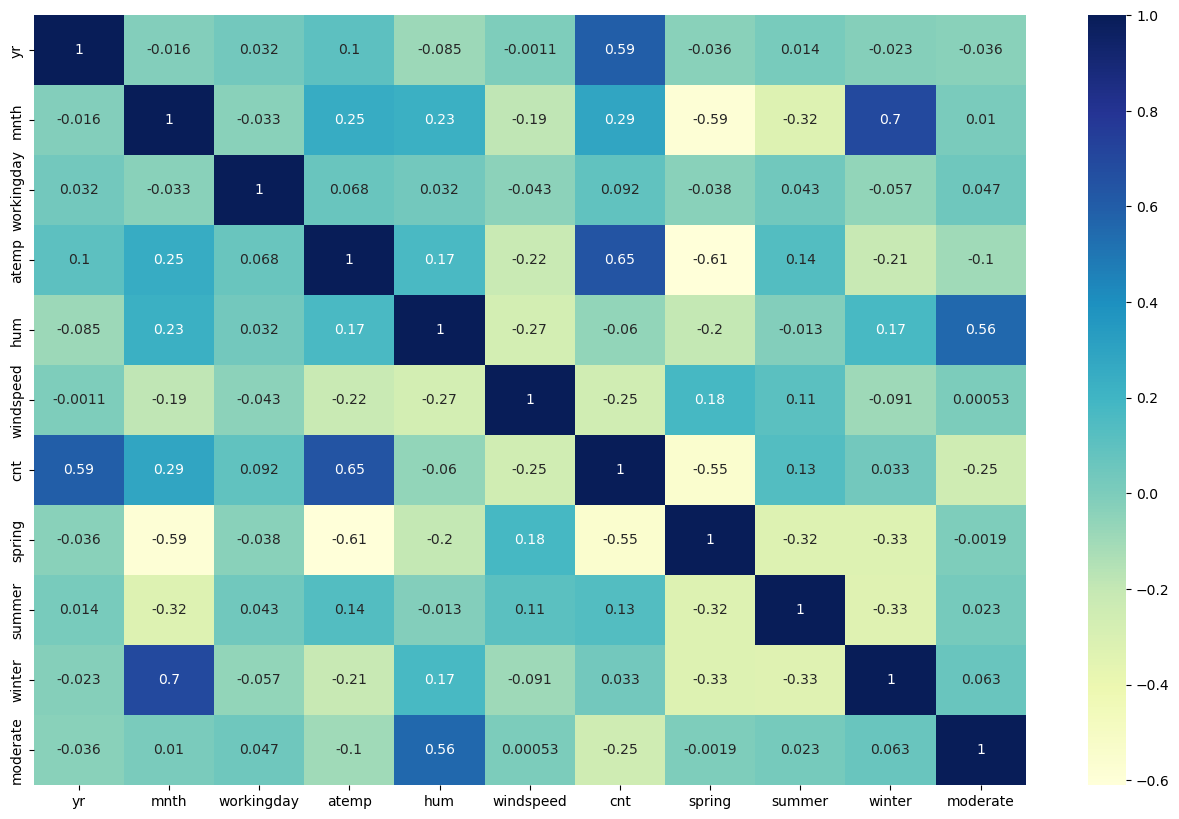

In [196]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [197]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [198]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [199]:
# Check the parameters obtained

lr.params

const         0.306706
yr            0.234034
mnth          0.002138
workingday    0.021903
atemp         0.507050
hum          -0.189186
windspeed    -0.191892
spring       -0.079123
summer        0.040477
winter        0.060856
moderate     -0.059347
dtype: float64

In [200]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     207.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.01e-170
Time:                        22:51:28   Log-Likelihood:                 456.34
No. Observations:                 510   AIC:                            -890.7
Df Residuals:                     499   BIC:                            -844.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3067      0.041      7.489      0.0

In [201]:
# dropping mnth all the feature variables to X
X_train.pop('mnth')
X_train_lm = X_train

In [202]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.320657
yr            0.233713
workingday    0.021637
atemp         0.508404
hum          -0.186182
windspeed    -0.191422
spring       -0.088613
summer        0.034025
winter        0.067627
moderate     -0.059901
dtype: float64

In [203]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.85e-171
Time:                        22:51:36   Log-Likelihood:                 455.97
No. Observations:                 510   AIC:                            -891.9
Df Residuals:                     500   BIC:                            -849.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3207      0.038      8.551      0.0

We have improved the adjusted R-squared.

In [204]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [205]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.33
2,atemp,14.46
4,windspeed,4.43
5,spring,3.47
1,workingday,3.04
7,winter,2.86
8,moderate,2.44
6,summer,2.15
0,yr,2.07


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

In [210]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop(['hum','atemp'], 1,)

In [211]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [212]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     196.9
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.54e-139
Time:                        22:52:42   Log-Likelihood:                 375.28
No. Observations:                 510   AIC:                            -734.6
Df Residuals:                     502   BIC:                            -700.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5832      0.017     34.894      0.0

In [213]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.59
1,workingday,2.42
3,spring,1.84
0,yr,1.82
4,summer,1.82
5,winter,1.64
6,moderate,1.56


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [214]:
y_train_price = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

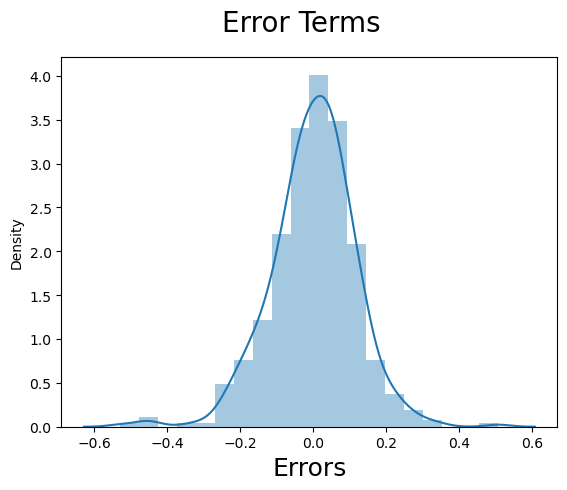

In [215]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [216]:
num_vars = ['atemp', 'windspeed', 'hum', 'cnt',]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [217]:
df_test.describe()

,yr,mnth,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.347032
std,0.500722,3.421875,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.477117
min,0.000000,1.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [218]:
y_test = df_test.pop('cnt')
X_test = df_test

In [219]:
X_test_new = X_test[['yr', 'workingday','windspeed', 'spring','summer','winter','moderate']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [220]:
# Making predictions using the second model

y_pred_new = lr_2.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

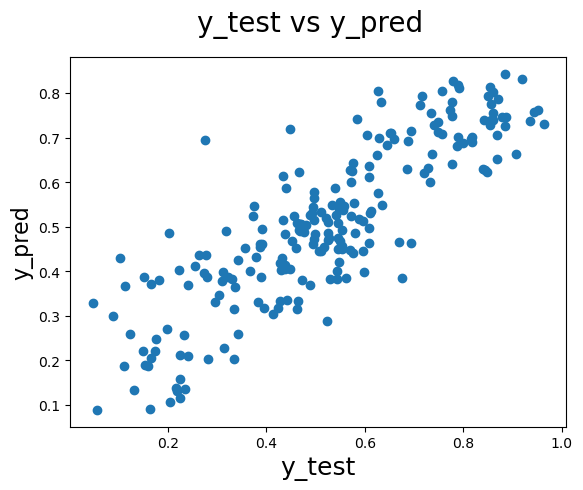

In [222]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_new)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Overall we have a decent model, but we also acknowledge that we could do better. 

In [223]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_new)

0.7203048437443098